In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm,preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


- # Data exploration

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

# there is no null value

- # Retrieving the unique values present in the 'quality' column 

In [5]:
unique=df['quality'].unique()
print(unique)

[5 6 7 4 8 3]


- # Exploring the dataset visually

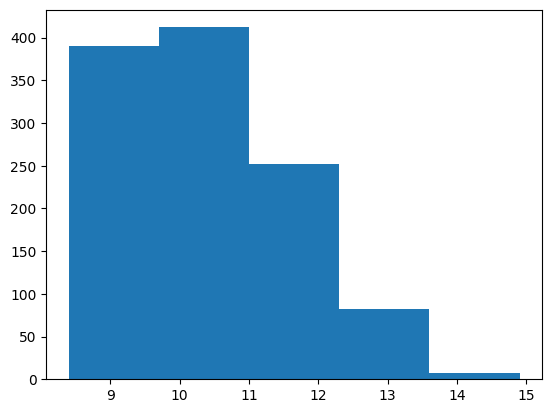

In [6]:
plt.hist(df['alcohol'], bins=5)
plt.show()

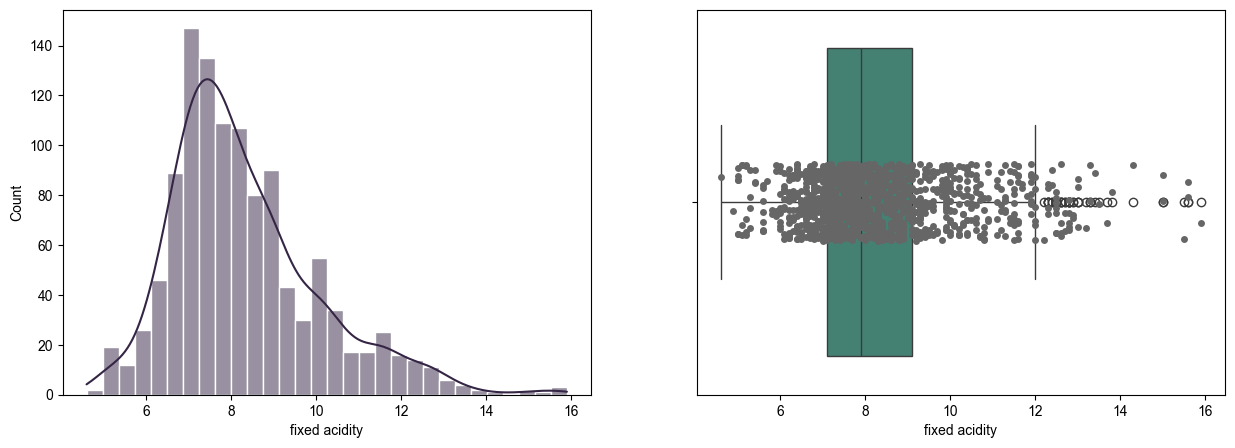

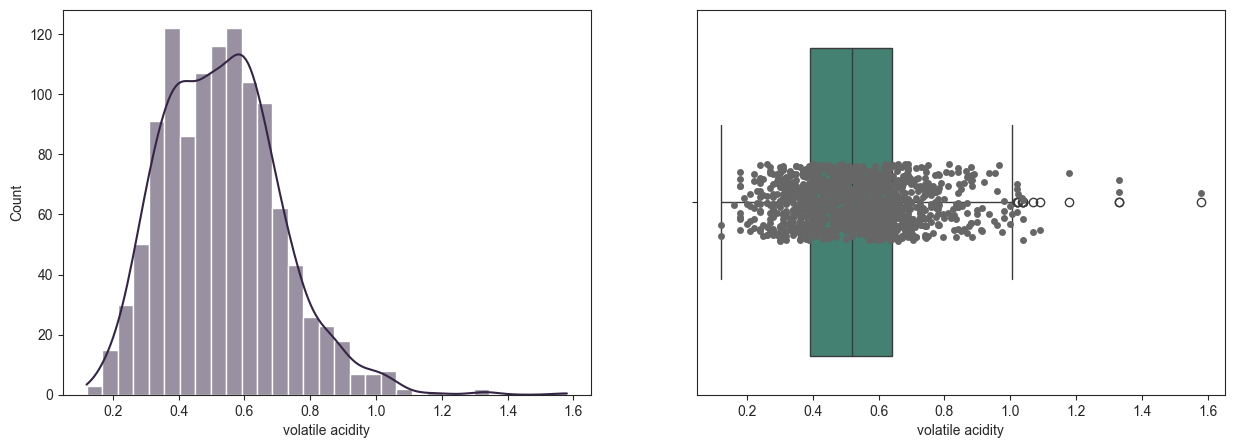

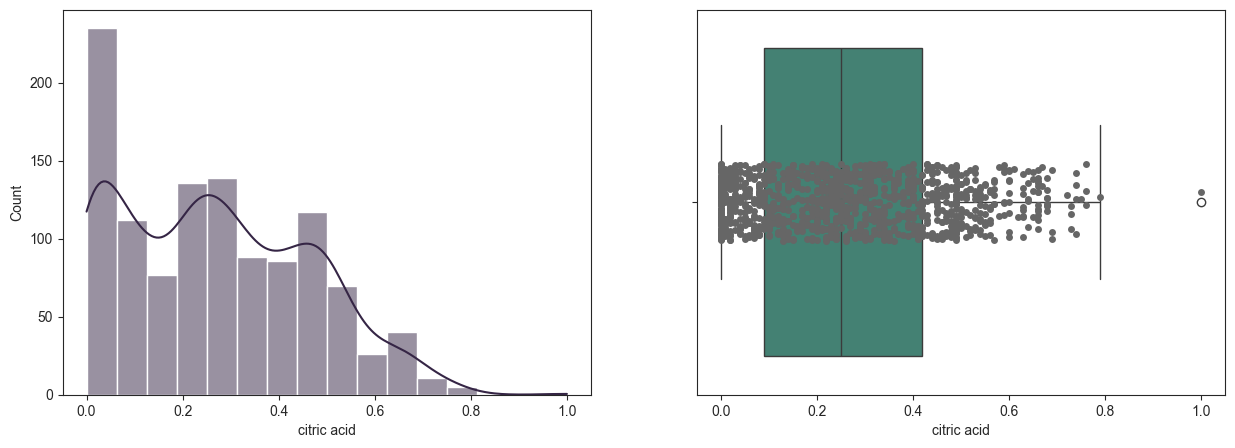

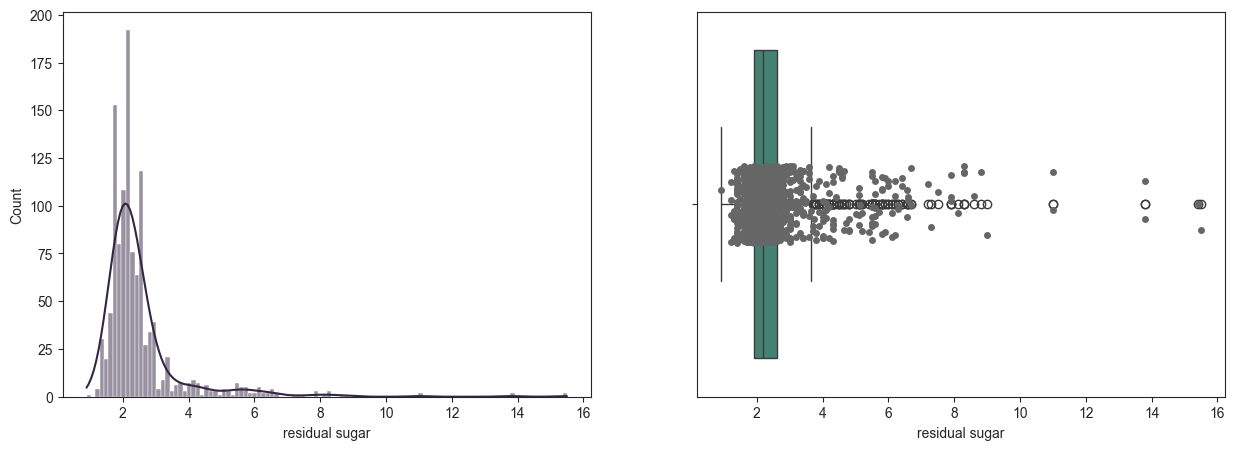

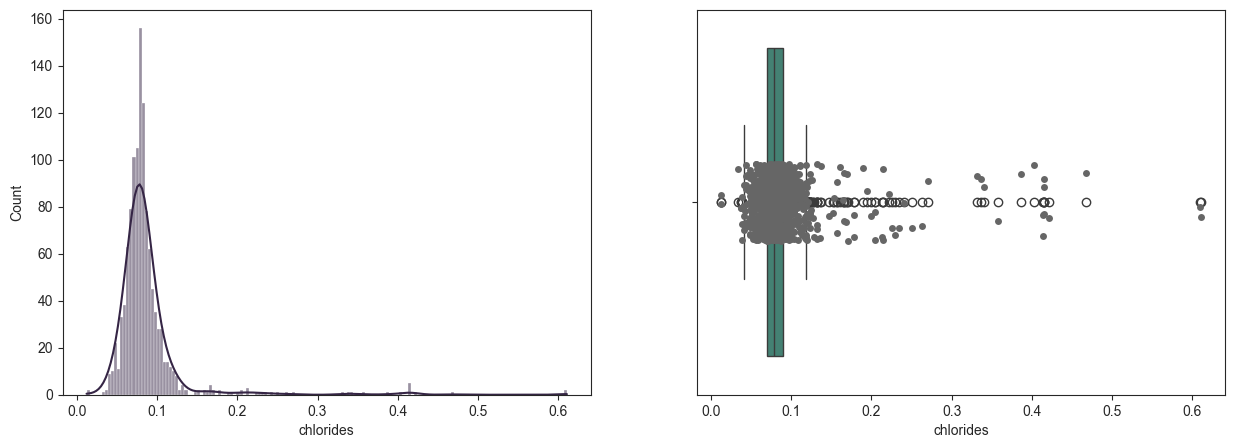

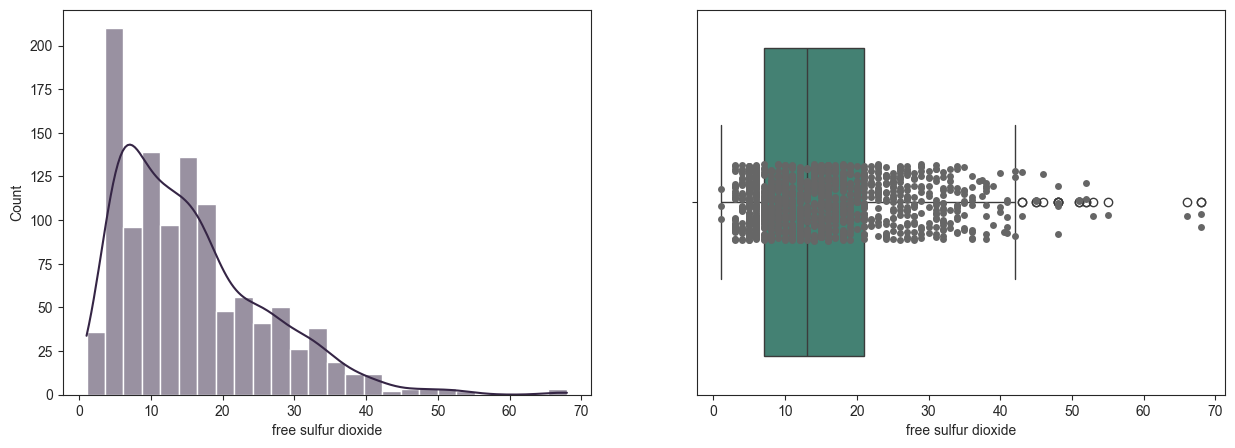

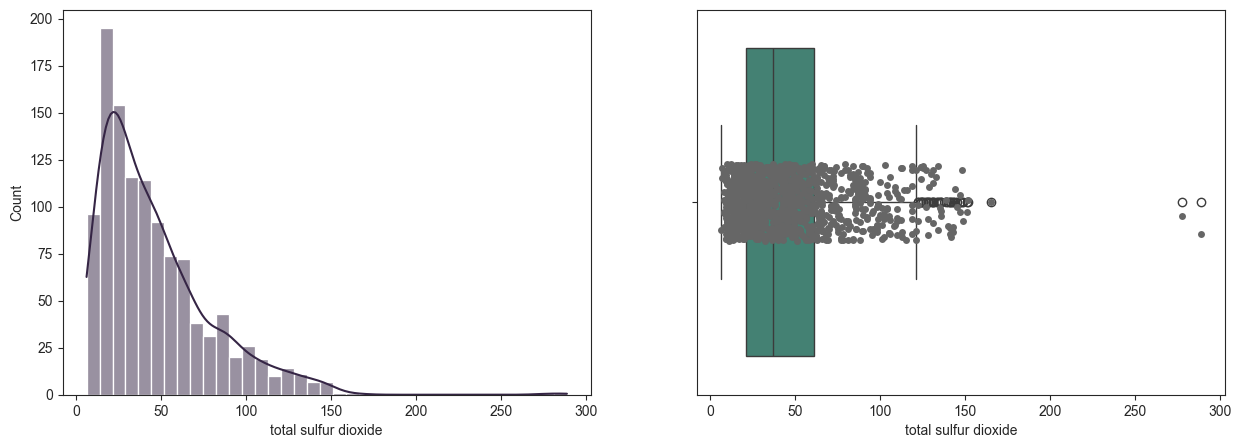

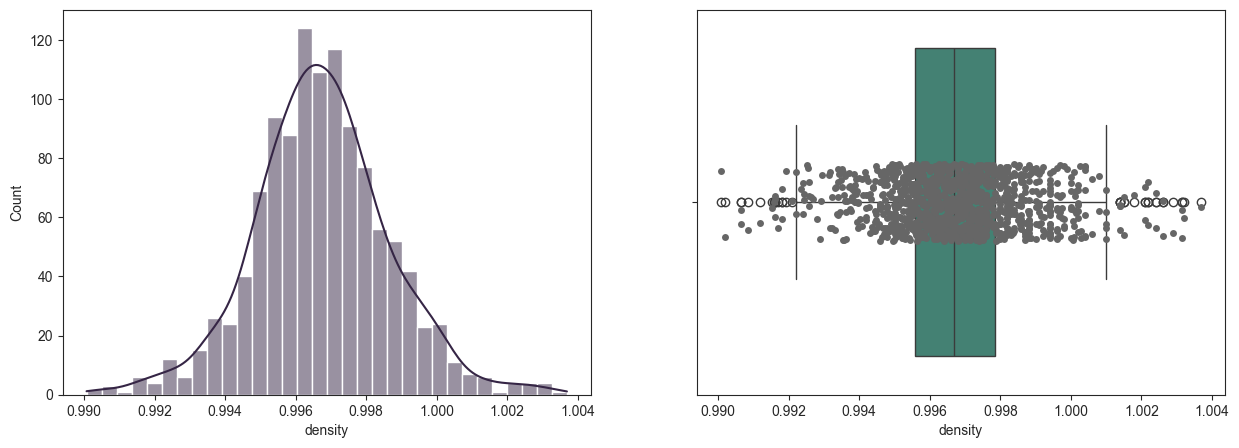

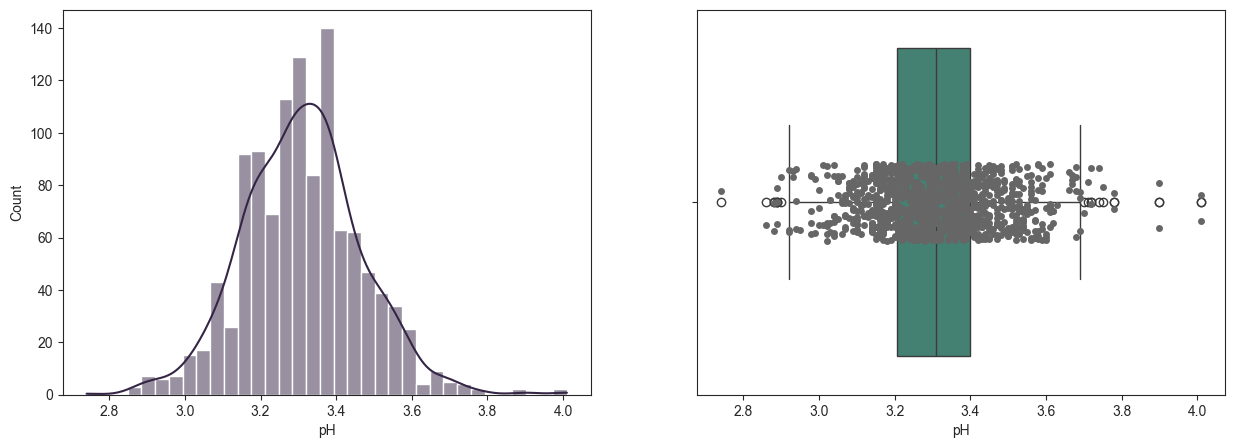

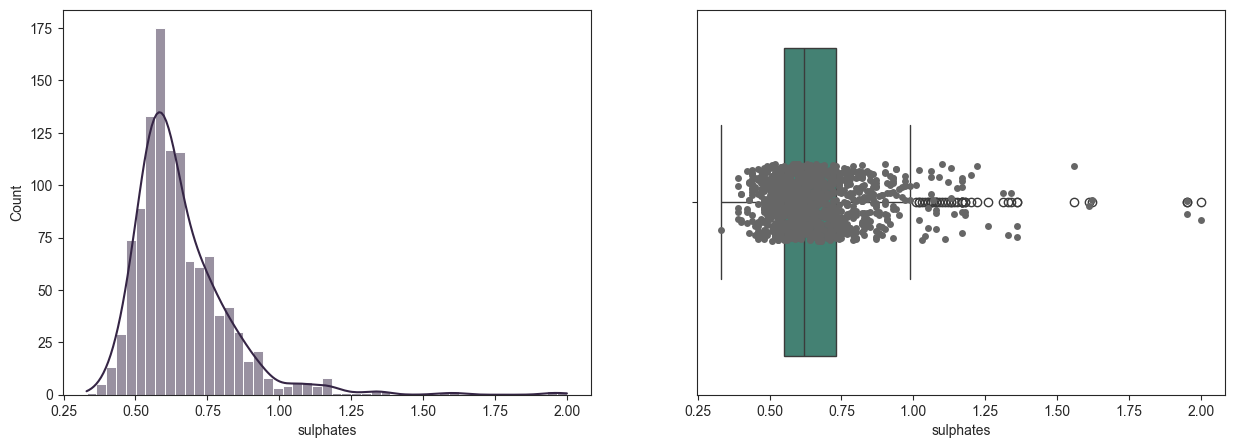

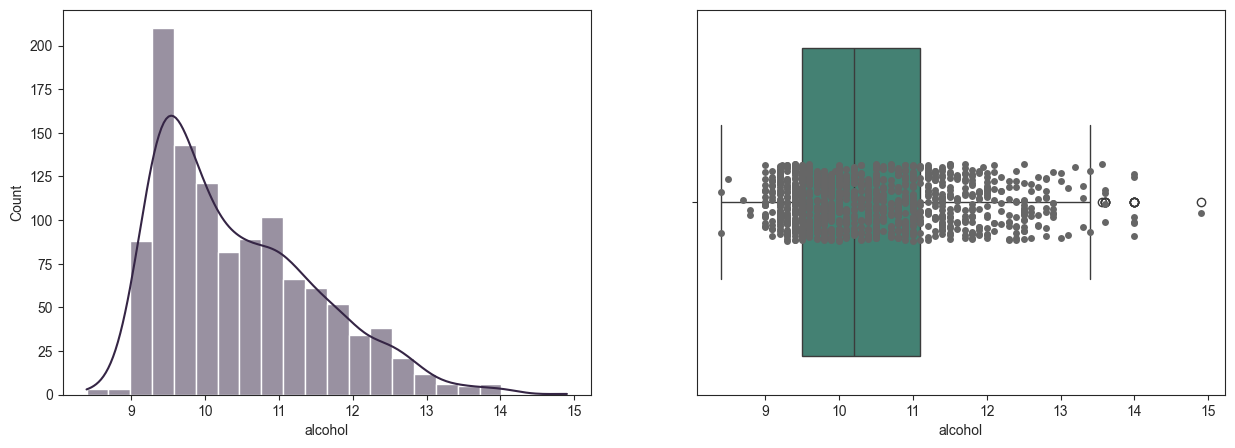

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
input_data = df.drop(columns=["quality", "Id"], axis=1) 
label = df["quality"]
def explore_feature_distributions(data_frame):
    for feature_name in data_frame.columns:
        fig, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)
        sns.set_style("ticks")  
        sns.histplot(data=data_frame, x=feature_name, kde=True, ax=ax[0], color="#352545")  
        ax[0].set_xlabel(feature_name)
        sns.boxplot(data=data_frame, x=feature_name, ax=ax[1], color="#3a8b79")
        sns.stripplot(data=data_frame, x=feature_name, color="0.4", ax=ax[1])  
    plt.show()
explore_feature_distributions(input_data)

# Data preprocessing 

In [8]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels=  oversample.fit_resample(df.drop(["quality"],axis=1),df["quality"])
scaler = preprocessing.MinMaxScaler()
names = features.columns
d = scaler.fit_transform(features)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.000000
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,0.000626
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,0.001252
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,0.001879
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.002505


In [9]:
#splitting training and testing data
X_train, X_test, y_train, y_test=train_test_split(scaled_df,labels,test_size=0.33,random_state=42)

- # Random forest model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8693834900731452


- # SVC model

In [11]:
svm_model = SVC(kernel='rbf', random_state=42)  
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(svm_accuracy)

0.7408568443051202


- # Stochastic Gradient Descent model

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss='log_loss', random_state=42) # Using 'log' loss for logistic regression
sgd_clf.fit(X_train, y_train)
predictions = sgd_clf.predict(X_test)
sgd_acc = accuracy_score(y_test, predictions)
print("Accuracy:", sgd_acc)

Accuracy: 0.6091954022988506


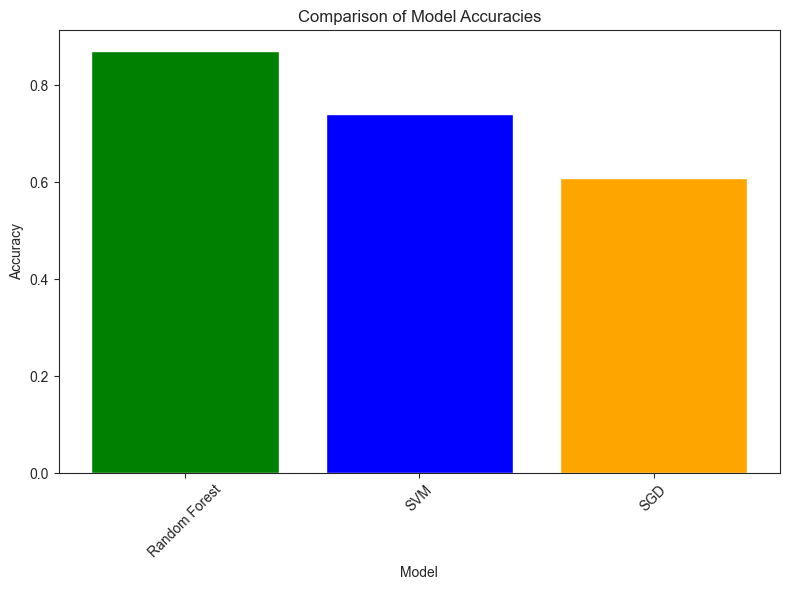

In [13]:
import matplotlib.pyplot as plt
model_names = ["Random Forest", "SVM", "SGD"] 
accuracies = [accuracy,svm_accuracy,sgd_acc]
plt.figure(figsize=(8, 6))  
plt.bar(model_names, accuracies, color=['green', 'blue', 'orange'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()  